<a href="https://colab.research.google.com/github/taruj/LendingClub_CaseStudy/blob/main/Taruj_Bhattacharya_Lending_Club_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Lending Club - Case Study**
## Group Facilitator: Taruj Bhattacharya
## Group Member: Nikhil Shinde

#### **Exploratory Data Analysis of Lending Club Data to Identify drivers for approving or rejecting loans based on applicant profile.**
---
### Problem Statement (Business Definition)
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:


*   If the applicant **is likely** to repay the loan, then not approving the loan results in a loss (Loss of Business)
*   If the applicant is **not likely** to repay the loan, approving the loan may lead to a financial loss for the company (Default)


In [46]:
# Load Data from Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [47]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # Supress Warnings 

 # Set float format to 2 decimal points 
pd.options.display.float_format = '{:.2f}'.format

plt.rcParams["figure.figsize"] = (10,10) # Set Default figsize of 15 by 15
plt.rcParams["axes.titlesize"] = 15
pd.set_option('display.max_columns', None)

In [48]:
loan_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/loan.csv', low_memory = False)
# low_memory = False has been set to suppress the Dtypewarning for column No 47. It has no impact on the code
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [49]:
# Check the size and shape of the data
print("No of rows and Columns in the data",loan_data.shape)

No of rows and Columns in the data (39717, 111)


In [50]:
def nulls(dataframe):
    values=dataframe.isnull().sum()
    percentage=100*dataframe.isnull().sum()/len(dataframe)
    table=pd.concat([values,percentage.round(2)],axis=1)
    table.columns=["No of missing values","Percent of Missing Values"]
    table=table[table['No of missing values']!=0].sort_values('Percent of Missing Values',ascending=False).style.background_gradient('OrRd')
    return table

In [51]:
nulls(loan_data) # before removing the null columns

,No of missing values,Percent of Missing Values
bc_open_to_buy,39717,100.000000
acc_open_past_24mths,39717,100.000000
bc_util,39717,100.000000
mo_sin_old_il_acct,39717,100.000000
mo_sin_old_rev_tl_op,39717,100.000000
mo_sin_rcnt_rev_tl_op,39717,100.000000
mo_sin_rcnt_tl,39717,100.000000
mort_acc,39717,100.000000
mths_since_recent_bc,39717,100.000000
mths_since_recent_bc_dlq,39717,100.000000


In [52]:
# Removing the columns which has all the rows as null 
loan_data=loan_data.dropna(how='all', axis=1)

In [53]:
nulls(loan_data) # Before removing the null columns

,No of missing values,Percent of Missing Values
next_pymnt_d,38577,97.130000
mths_since_last_record,36931,92.990000
mths_since_last_delinq,25682,64.660000
desc,12940,32.580000
emp_title,2459,6.190000
emp_length,1075,2.710000
pub_rec_bankruptcies,697,1.750000
last_pymnt_d,71,0.180000
collections_12_mths_ex_med,56,0.140000
chargeoff_within_12_mths,56,0.140000


In [54]:
# Drop the columns with null greater than 30 percent
loan_data=loan_data.drop(["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d"],axis=1) 
loan_data=loan_data.drop(columns=["zip_code","sub_grade","url","pymnt_plan","application_type","earliest_cr_line","last_pymnt_d","initial_list_status","last_pymnt_d","last_pymnt_d","chargeoff_within_12_mths","pub_rec_bankruptcies","last_credit_pull_d","last_credit_pull_d","collections_12_mths_ex_med","policy_code","delinq_amnt","tax_liens","acc_now_delinq"])# removing the columns which has single value and date containing columns in complete data

# We will drop these column since they contain only 1 value and they don't add any value to the Analysis 

# Also Drop the id and member id as they are non numberical or categorical 
loan_data.drop(columns=["id","member_id"],inplace=True)

 # Data after removing the null values



In [55]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.00,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,2500,2500,2500.00,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.00,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,10000,10000,10000.00,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,3000,3000,3000.00,60 months,12.69%,67.79,B,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79


In [56]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   emp_title                37258 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [57]:
# Cleaning the data by Removing 'months' and '%' from the term and int_rate 
loan_data["term"]=loan_data["term"].str.strip("months")
loan_data["int_rate"]=loan_data["int_rate"].str.strip("%")


In [58]:
loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.00,36,10.65,162.87,B,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,2500,2500,2500.00,60,15.27,59.83,C,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.00,36,15.96,84.33,C,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,10000,10000,10000.00,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,3000,3000,3000.00,60,12.69,67.79,B,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.00,36,8.07,78.42,A,FiSite Research,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,CO,11.33,0,0,13,0,7274,13.10%,40,0.00,0.00,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90
39713,8500,8500,875.00,36,10.28,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,NC,6.40,1,1,6,0,8847,26.90%,9,0.00,0.00,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94
39714,5000,5000,1325.00,36,8.07,156.84,A,NaN,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,0.00,0.00,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00
39715,5000,5000,650.00,36,7.43,155.38,A,NaN,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,other,JAL Loan,MD,3.72,0,0,17,0,85607,0.70%,26,0.00,0.00,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,0.00


 # Univariate Analysis

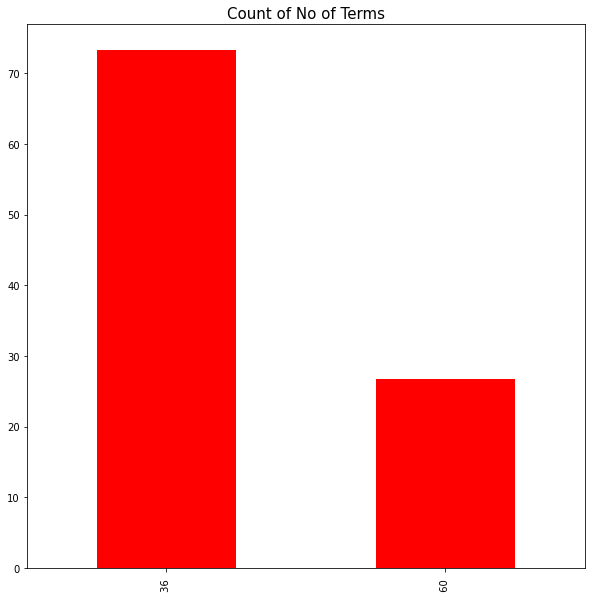

<Figure size 720x720 with 0 Axes>

In [59]:
term=loan_data["term"].value_counts(normalize=True)*100
term.plot(kind="bar",color="r")
plt.title("Count of No of Terms")
plt.show()
plt.savefig("Count of No of Terms.png")
plt.show()

From the figure above we can see most of the loans are given for the term of 36 or 60 months 

1.   List item
2.   List item




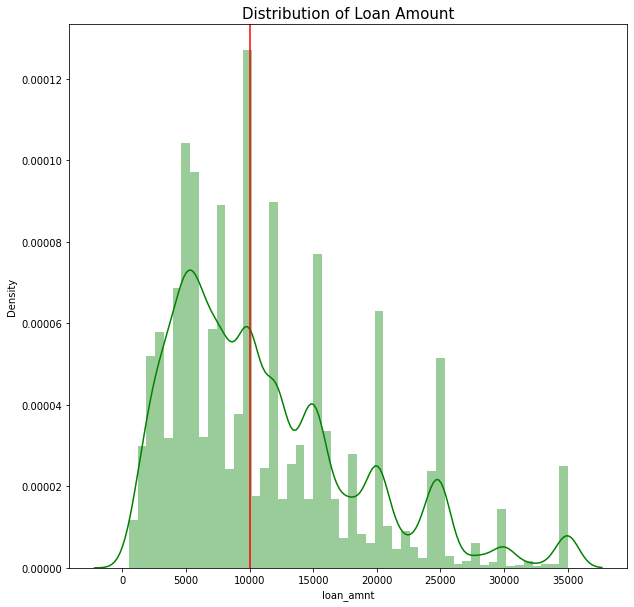

Median loan_amount  10000.0
Skewness of the loan_amt 1.0817102383375885


In [60]:
# Plot for loan_amnt
sns.distplot(loan_data["loan_amnt"],color="green")
plt.axvline(loan_data["loan_amnt"].median(),color="red")

plt.title("Distribution of Loan Amount")
plt.show()

print("Median loan_amount ",loan_data["loan_amnt"].median())
print("Skewness of the loan_amt",loan_data["funded_amnt"].skew())

* Median loan amount requested is 10000
* while the skewness it high in loan_amount that is there is more people who have been requested loans above 10000 which is median

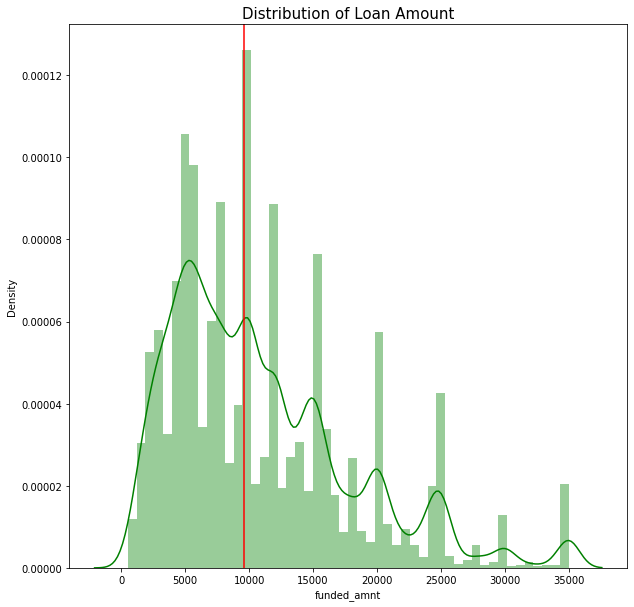

Median funded_amount  9600.0
Skewness of the loan_amt 1.0817102383375885


In [61]:
# Plot for loan_amnt
sns.distplot(loan_data["funded_amnt"],color="green")
plt.axvline(loan_data["funded_amnt"].median(),color="red")
plt.title("Distribution of Loan Amount")
plt.show()
print("Median funded_amount ",loan_data["funded_amnt"].median())
print("Skewness of the loan_amt",loan_data["funded_amnt"].skew())

* we can see that the loan_amount requested and loan_amount funded has difference in median of $400
* funded amount seem to be highly right skewed 

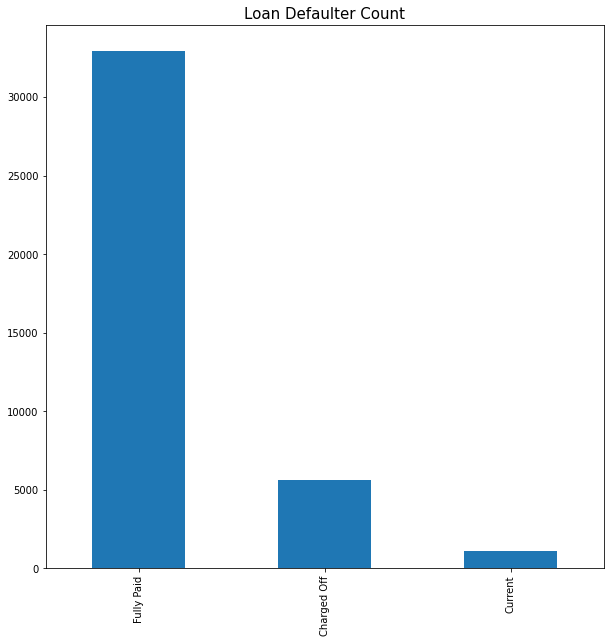

In [62]:
loan_data["loan_status"].value_counts().plot(kind="bar")
plt.title("Loan Defaulter Count")
plt.show()

**Loan Status**

*We can see that the loan_status is fully paid then its considered as fully paid*

*Charged off tells that the loan is defaulted*

*While Current is the loan which is going on and hasn't defaulted any EMI*

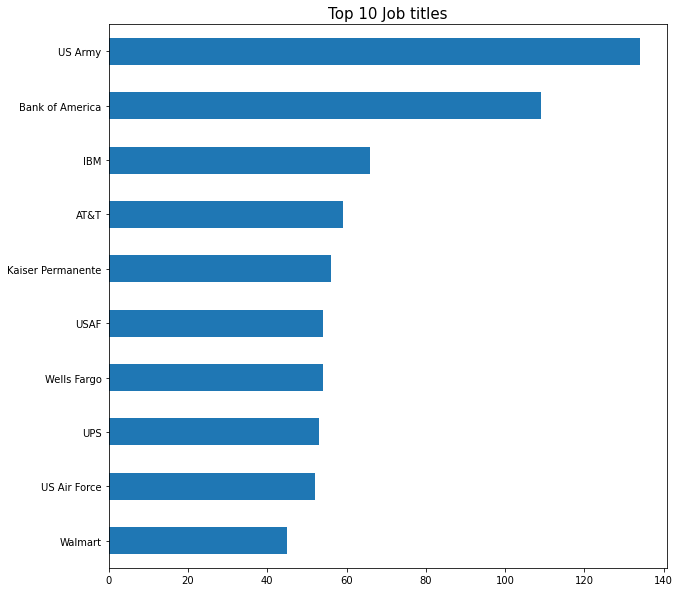

In [63]:
loan_data["emp_title"].value_counts().head(10).sort_values().plot(kind="barh")
plt.title("Top 10 Job titles")
plt.show()

**We can see that the data for top 10 employee Title the top most is US Army while 2nd is Bank of America**

**We can see the data descrepancy in the data where the USAF and US air force should be in same category**

In [64]:
# Change the category to single category
loan_data["emp_title"]=loan_data["emp_title"].replace({"USAF":"US Air Force"})

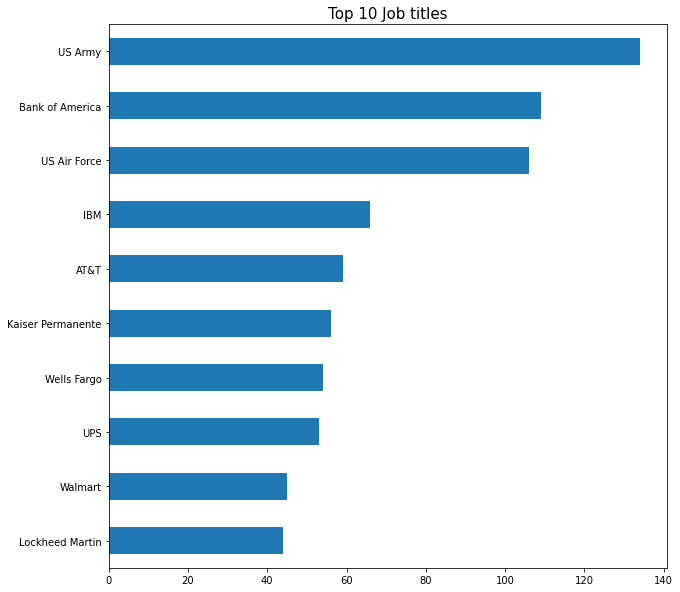

In [65]:
loan_data["emp_title"].value_counts().head(10).sort_values().plot(kind="barh")
plt.title("Top 10 Job titles")
plt.show()

**After replacing the data we can see that the US air force has moved to 3rd position which was previously divided**

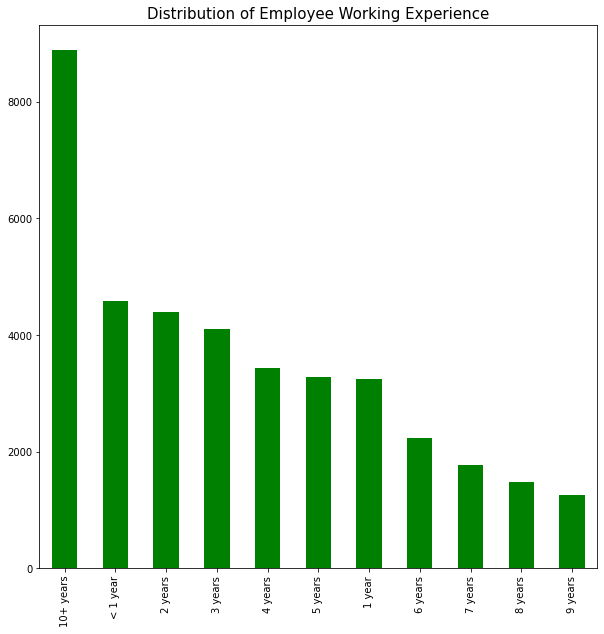

In [66]:

loan_data["emp_length"].value_counts().sort_values(ascending=False).plot(kind="bar",color="Green")
plt.title("Distribution of Employee Working Experience")
plt.show()

**We can see that the data shows that people with 10+ years of experience takes more loans than the people with Experience 9 years the data shows really weird results since there is no more difference between 9 and 10 year experience people** 

**We can also see that the people within 1 year take lot of loans after people experience more than 10 years**

In [67]:
loan_data['int_rate']=loan_data['int_rate'].astype('float64')# changed the data type from object to float

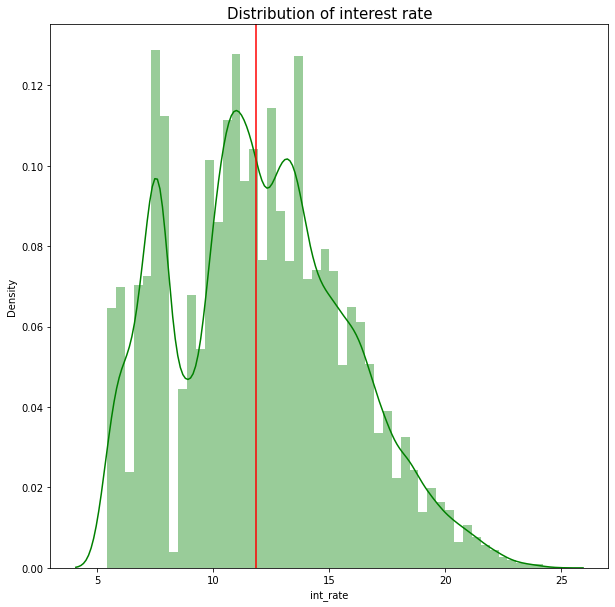

Median interest_rates  11.86
Skewness of the interest_rates 0.2937286765747475


In [68]:
# scatter plot for loan_amnt
sns.distplot(loan_data["int_rate"],color="green")
plt.axvline(loan_data["int_rate"].median(),color="red")
plt.title("Distribution of interest rate")
plt.show()
print("Median interest_rates ",loan_data["int_rate"].median())
print("Skewness of the interest_rates",loan_data["int_rate"].skew())

**The median interest rates are 11.86 and the data is almost normally distributed**

1.   List item
2.   List item



In [69]:
# converting the month_year format from object to date
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.00,36,10.65,162.87,B,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,2500,2500,2500.00,60,15.27,59.83,C,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.00,36,15.96,84.33,C,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,10000,10000,10000.00,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,3000,3000,3000.00,60,12.69,67.79,B,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79



 # Bivariate Analysis


# # #  # LOAN AMOUNT VS LOAN STATUS

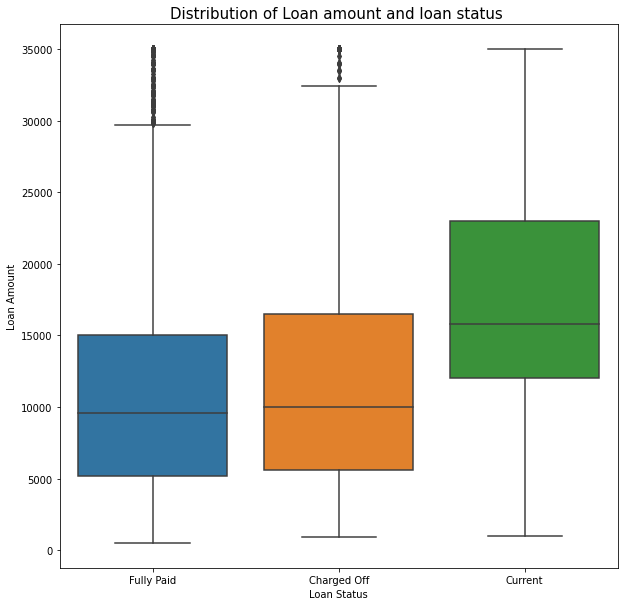

In [70]:
sns.boxplot(y="loan_amnt",x="loan_status",data=loan_data)
plt.title("Distribution of Loan amount and loan status ")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

**We can see that the data loan status has 3 categories and the current category doesnt seem to helpful in Prediction so we should remove it**

**The loans that are charged of are usually in the range of 5k to 16k and with some outliers**

**People tend to pay it more offntly than charging it off the most of the data lies in 5k to 15k range where people tend to pay the loans fully**

In [71]:
loan_data=loan_data[loan_data["loan_status"]!="Current"]

### Loan Status vs Interest Rates


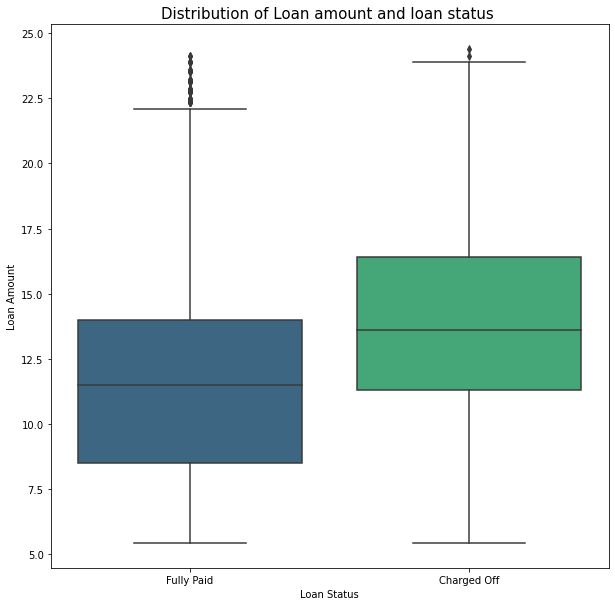

In [72]:
sns.boxplot(y="int_rate",x="loan_status",data=loan_data,palette="viridis")
plt.title("Distribution of Loan amount and loan status ")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

**The data shows that the loans Charged off are the loan which are higher than 11% and most of the charged off are because of higher interest Rates** 

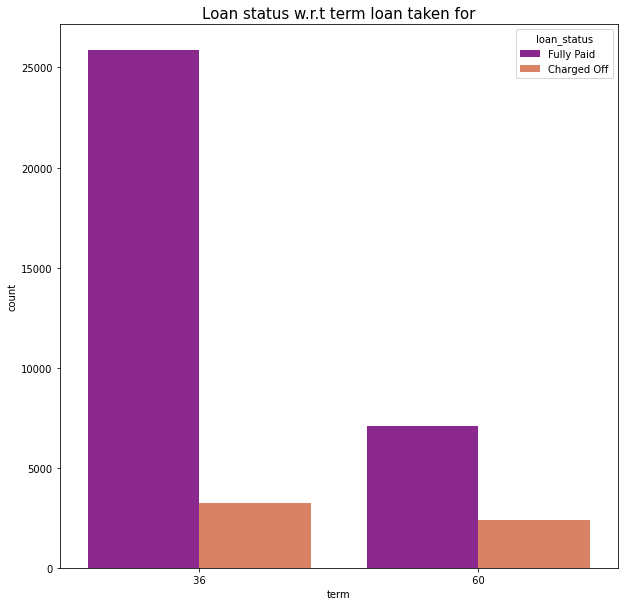

In [73]:

sns.countplot(x="term",hue="loan_status",data=loan_data,palette="plasma")
plt.title("Loan status w.r.t term loan taken for")
plt.show()

**We can see that the loans are charged of more often in 36 months period while previously we saw that because of the interest rate the loan were charged off soo we can consider this assumption that the loan with less term and high interest rates are waived off usually**

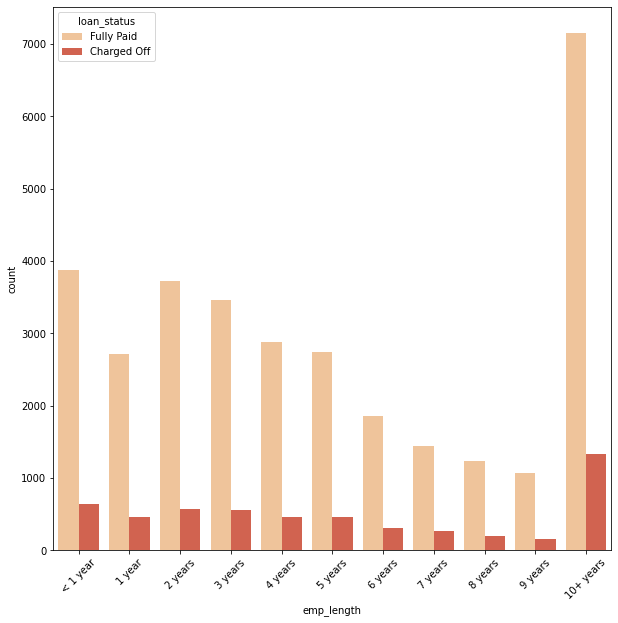

In [74]:
order=[ '< 1 year',
       '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 
 '6 years',
 '7 years',
 '8 years',
 '9 years','10+ years']
sns.countplot(x="emp_length",data=loan_data,hue="loan_status",order=order,palette="OrRd")
plt.xticks(rotation=45)
plt.show()

**We can see in the data that there is more charged off if the employee is having expperience more than 10 years also the employee who seem to be having experience less than 1 year seem to take lot of loans and charge them off**

 # Multivariate Analysis

# #  # Correlation Heatmap

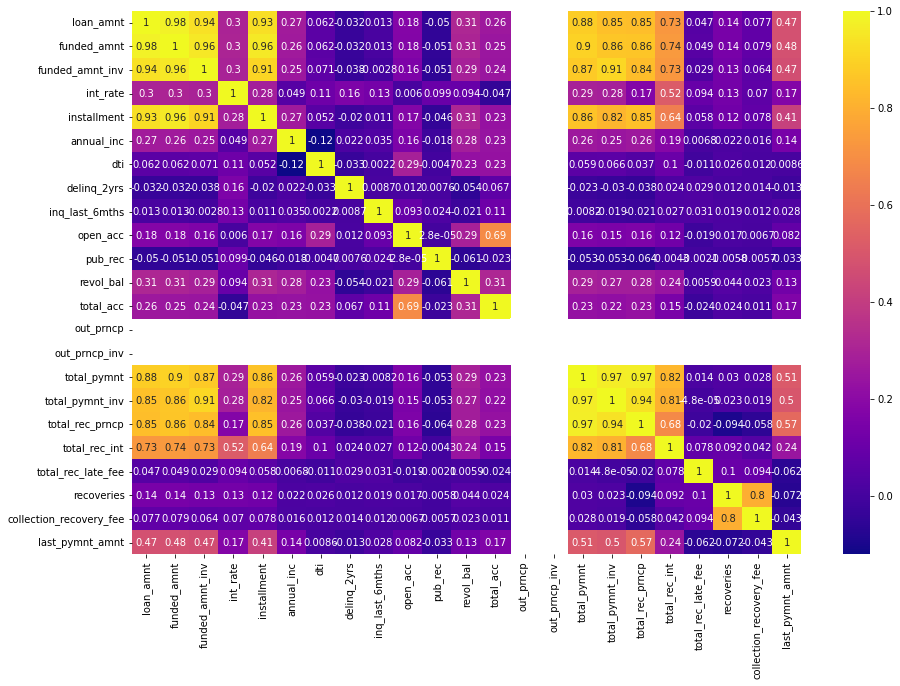

In [75]:
corr=loan_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="plasma")
plt.show()

**We can see that loan_amnt is highly correlated to installment,**

**Collection_recovery fee is highly correlated to recovery**

**Last recorded interest is highly correlated to funded amount**


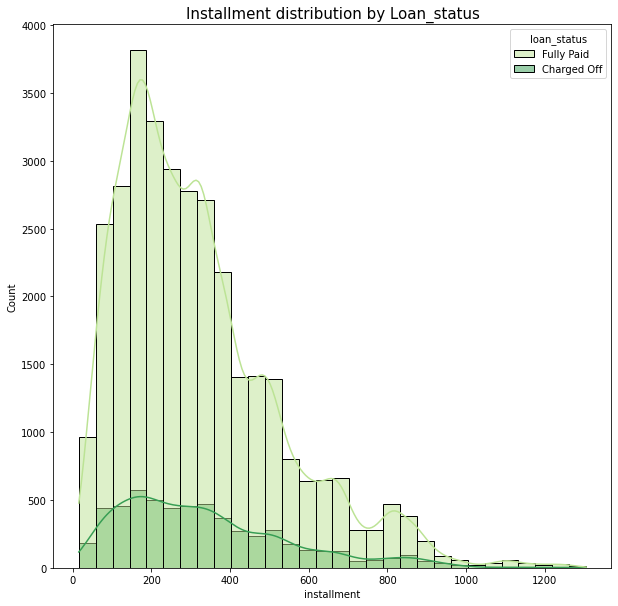

In [76]:
sns.histplot(data=loan_data,x="installment",bins=30,kde=True,hue="loan_status",palette="YlGn")
plt.title("Installment distribution by Loan_status")
plt.show()


**We can see that the most of the distribution of the installment lies between 0 to 600 who have charged off there loans**

**While we can see that most of people fully paid there loans lies between 0 to 800**

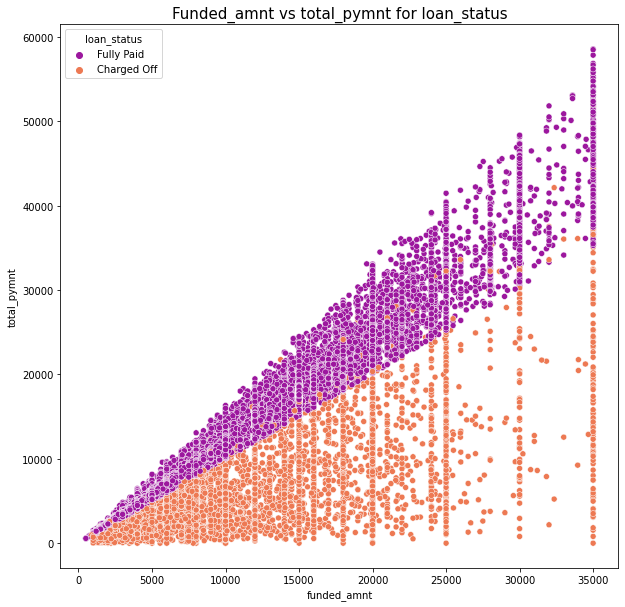

In [77]:
sns.scatterplot(x="funded_amnt",y="total_pymnt",data=loan_data,hue="loan_status",palette="plasma")
plt.title("Funded_amnt vs total_pymnt for loan_status")
plt.show()

**we can see that the data is creating a funnel like shape**

**When the funded amount is increasing the total_pymnt is almost constant for the charged off that is 0 and which can be assumed that they havent paid any installments**

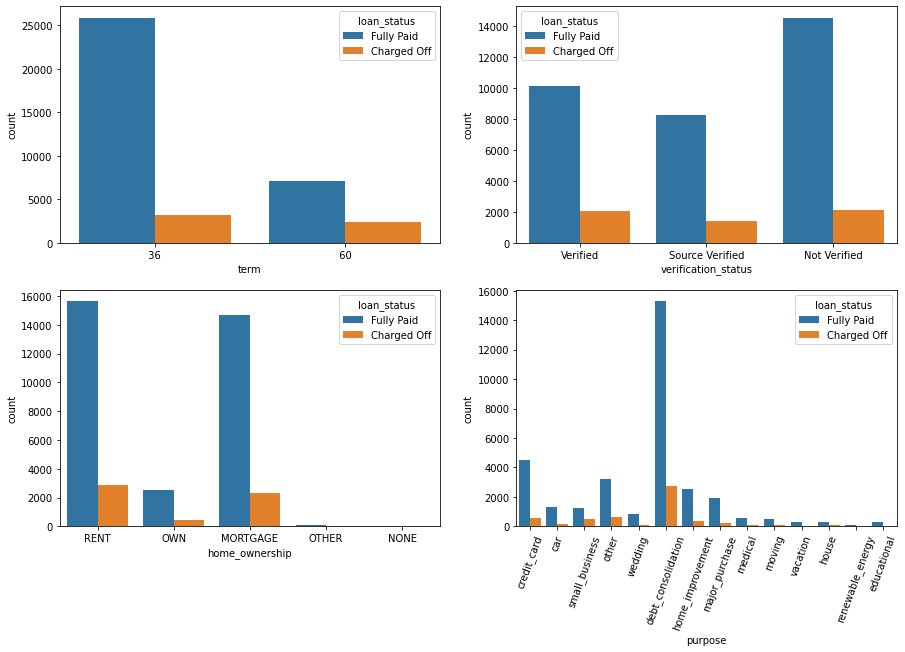

In [78]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.countplot(x='term',data=loan_data,hue="loan_status")

plt.subplot(4,2,2)
sns.countplot(x='verification_status',data=loan_data,hue="loan_status")

plt.subplot(4,2,3)
sns.countplot(x="home_ownership",data=loan_data,hue="loan_status")

plt.subplot(4,2,4)
sns.countplot(x="purpose",data=loan_data,hue="loan_status")
plt.xticks(rotation=70)
plt.show()


**Insights***
**People who are taking the loans for 60 terms have lower defaulter rate than who takes it for lower terms**
* **The verification status shows that the most of people who are source verified tent default loans very less than while when the source isnt verified the person tend to default the loan**
* **If the person having the own house its seems very rare that he would default the loan and the rented houses tend to default the loans more often**

* **when a person takes the laon for debt consolidation there is more risk the person will default the loans**



 # Conclusions
# #  # Loan Default and Non Defaulter Predictions
****
#  # Data Description
1. **No of rows and Columns in the data (39717, 111)**

2. **Dropped all of the columns which has no values**

3. **Cleaned the data which had sum extra symbols in the data**
****
#  #  Univarite Analysis
****
4. Most of the loans are give for the term of 36 or 60 months 

    **Loan Status**

5. **The loan_status is fully paid then its considered as Non Defaulter**

6. **Charged off tells that the loan is defaulted**

7. **While Current is the loan which is going on and hasn't defaulted any EMI**

8. **The data for top 10 employee Title the top most is US Army while 2nd is Bank of America**

9. **The data descrepancy in the data where the USAF and US air force should be in same category**

10. **We can see that the data shows that people with 10+ years of experience takes more loans than the people with Experience**

     **9 years the data shows really weird results since there is no more difference between 9 and 10 year experience people** 

11. **We can also see that the people within 1 year take lot of loans after people experience more than 10 years**
****
#  # Bivariate Analysis
****
12. **We can see that the data loan status has 3 categories and the current category doesnt seem to helpful in Prediction so we should remove it**

13. **The loans that are charged of are usually in the range of 5k to 16k and with some outliers**

14. **People tend to pay it more offntly than charging it off the most of the data lies in 5k to 15k range where people tend to pay the loans fully****

15. **The data shows that the loans Charged off are the loan which are higher than 11% and most of the charged off are because of higher interest Rates** 

16. **We can see that the loans are charged of more often in 36 months period while previously we saw that because of**
    
17. **We can see in the data that there is more charged off if the employee is having expperience more than 10 years also the employee**
    
    **who seem to be having experience less than 1 year seem to take lot of loans and charge them off**
****
#  # Multivariate analysis
****
18. **Loan_amnt is highly correlated to installment**

**Collection_recovery fee is highly correlated to recovery**

**Last recorded interest is highly correlated to funded amount**

19. **We can see that the most of the distribution of the installment lies between 0 to 600 who have charged off there loans**

    **While we can see that most of people fully paid there loans lies between 0 to 800**
20. **We can see that the most of the distribution of the installment lies between 0 to 600 who have charged off there loans**

    **While we can see that most of people fully paid there loans lies between 0 to 800**
    
21. **People who are taking the loans for 60 terms have lower defaulter rate than who takes it for lower terms**
     
     **The verification status shows that the most of people who are source verified tent default loans very less than**
     
     **while when the source isnt verified the person tend to default the loan**
     
     **If the person having the own house its seems very rare that he would default the loan and the rented houses tend to default the loans more often**
     
     **when a person takes the laon for debt consolidation there is more risk the person will default the loans**




 # Next Steps
**Next Steps that can be done remove the redundant columns which are having high correlation value**

**Feature Engineer the data with new columns which will help get new information**

**Use different Classification Algorithms to predict the Non Defaulter and Defaulters and try to get new test data to test it on it**